In [68]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [14]:
df_consumption = pd.read_csv('consumption_data.csv')
df_consumption = df[df['Consumption_kW'] != 0] # remove 0 values

In [16]:
df_consumption['Hour'] = df_consumption['Hour'] + 0

In [18]:
df_consumption['Hour'] = df_consumption['Hour'] +1

In [19]:
df_consumption

,index,Interval_Start,Interval_End,Consumption_kW,Consumption_kWh,Hour,Time
0,0,2024-01-01 00:00:00,2024-01-01 00:15:00,242,242,1,00:00:00
1,1,2024-01-01 00:15:00,2024-01-01 00:30:00,254,254,1,00:15:00
2,2,2024-01-01 00:30:00,2024-01-01 00:45:00,252,252,1,00:30:00
3,3,2024-01-01 00:45:00,2024-01-01 01:00:00,251,251,1,00:45:00
4,4,2024-01-01 01:00:00,2024-01-01 01:15:00,243,243,2,01:00:00
...,...,...,...,...,...,...,...
16216,16216,2024-06-17 23:00:00,2024-06-17 23:15:00,249,249,24,23:00:00
16217,16217,2024-06-17 23:15:00,2024-06-17 23:30:00,252,252,24,23:15:00
16218,16218,2024-06-17 23:30:00,2024-06-17 23:45:00,246,246,24,23:30:00
16219,16219,2024-06-17 23:45:00,2024-06-18 00:00:00,245,245,24,23:45:00


In [36]:
# Load the spot prices data with the correct delimiter
# Load the spot prices CSV file
spot_prices_file_path = 'spot_prices2024.csv'
spot_prices_data = pd.read_csv(spot_prices_file_path, delimiter=';')

# Display the first few rows to verify the structure
spot_prices_data.head()





,Day,Hour,Price (Kč/MWh)
0,01.01.2024,1,"2,47"
1,01.01.2024,2,"0,25"
2,01.01.2024,3,"0,50"
3,01.01.2024,4,"0,00"
4,01.01.2024,5,"-0,25"


In [38]:


# Load the CSV file
file_path = 'consumption_data.csv'
consumption_data = pd.read_csv(file_path)
#add +1 to the hour column
consumption_data['Hour'] = consumption_data['Hour'] + 1

# Display the first few rows of the dataframe to understand its structure
consumption_data.head()

,index,Interval_Start,Interval_End,Consumption_kW,Consumption_kWh,Hour,Time
0,0,2024-01-01 00:00:00,2024-01-01 00:15:00,242,242,1,00:00:00
1,1,2024-01-01 00:15:00,2024-01-01 00:30:00,254,254,1,00:15:00
2,2,2024-01-01 00:30:00,2024-01-01 00:45:00,252,252,1,00:30:00
3,3,2024-01-01 00:45:00,2024-01-01 01:00:00,251,251,1,00:45:00
4,4,2024-01-01 01:00:00,2024-01-01 01:15:00,243,243,2,01:00:00


In [41]:
# Check the unique values in the 'Price (Kč/MWh)' column to understand the issue
spot_prices_data['Price (Kč/MWh)'].unique()


array([2.47000e+00, 2.50000e-01, 5.00000e-01, ..., 2.59905e+03,
       2.66196e+03, 2.39287e+03])

In [ ]:
# Remove spaces and replace commas with dots, then convert to float
spot_prices_data['Price (Kč/MWh)'] = spot_prices_data['Price (Kč/MWh)'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the Day column to datetime
spot_prices_data['Day'] = pd.to_datetime(spot_prices_data['Day'], format='%d.%m.%Y')

# Merge the spot prices data with the consumption data
consumption_data['Interval_Start'] = pd.to_datetime(consumption_data['Interval_Start'])
consumption_data['Date'] = consumption_data['Interval_Start'].dt.date

# Join on Date and Hour
merged_data = pd.merge(consumption_data, spot_prices_data, how='left', left_on=['Date', 'Hour'], right_on=[spot_prices_data['Day'].dt.date, 'Hour'])


# Display the first few rows of the merged data
merged_data.head()


In [69]:
import pandas as pd

# Load the CSV file
file_path = 'consumption_data.csv'
consumption_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
consumption_data.head()


,index,Interval_Start,Interval_End,Consumption_kW,Consumption_kWh,Hour,Time
0,0,2024-01-01 00:00:00,2024-01-01 00:15:00,242,242,0,00:00:00
1,1,2024-01-01 00:15:00,2024-01-01 00:30:00,254,254,0,00:15:00
2,2,2024-01-01 00:30:00,2024-01-01 00:45:00,252,252,0,00:30:00
3,3,2024-01-01 00:45:00,2024-01-01 01:00:00,251,251,0,00:45:00
4,4,2024-01-01 01:00:00,2024-01-01 01:15:00,243,243,1,01:00:00


In [46]:
# Load the spot prices CSV file
spot_prices_file_path = 'spot_prices2024.csv'
spot_prices_data = pd.read_csv(spot_prices_file_path, delimiter=';')

# Display the first few rows of the spot prices dataframe to understand its structure
spot_prices_data.head()


,Day,Hour,Price (Kč/MWh)
0,01.01.2024,1,"2,47"
1,01.01.2024,2,"0,25"
2,01.01.2024,3,"0,50"
3,01.01.2024,4,"0,00"
4,01.01.2024,5,"-0,25"


In [70]:
# Clean the spot prices data
spot_prices_data['Price (Kč/MWh)'] = spot_prices_data['Price (Kč/MWh)'].str.replace(',', '.').astype(float)

# Convert the Day column to datetime
spot_prices_data['Day'] = pd.to_datetime(spot_prices_data['Day'], format='%d.%m.%Y')

# Merge the spot prices data with the consumption data
consumption_data['Interval_Start'] = pd.to_datetime(consumption_data['Interval_Start'])
consumption_data['Date'] = consumption_data['Interval_Start'].dt.date

# Join on Date and Hour
merged_data = pd.merge(consumption_data, spot_prices_data, how='left', left_on=['Date', 'Hour'], right_on=[spot_prices_data['Day'].dt.date, 'Hour'])

import ace_tools as tools; tools.display_dataframe_to_user(name="Merged Data with Spot Prices", dataframe=merged_data)

# Display the first few rows of the merged data
merged_data.head()


AttributeError: Can only use .str accessor with string values!

In [71]:
# Check the unique values in the 'Price (Kč/MWh)' column to understand the issue
spot_prices_data['Price (Kč/MWh)'].unique()


array([2.47000e+00, 2.50000e-01, 5.00000e-01, ..., 2.59905e+03,
       2.66196e+03, 2.39287e+03])

In [72]:
# Remove spaces and replace commas with dots, then convert to float
spot_prices_data['Price (Kč/MWh)'] = spot_prices_data['Price (Kč/MWh)'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Convert the Day column to datetime
spot_prices_data['Day'] = pd.to_datetime(spot_prices_data['Day'], format='%d.%m.%Y')

# Merge the spot prices data with the consumption data
consumption_data['Interval_Start'] = pd.to_datetime(consumption_data['Interval_Start'])
consumption_data['Date'] = consumption_data['Interval_Start'].dt.date

# Join on Date and Hour
merged_data = pd.merge(consumption_data, spot_prices_data, how='left', left_on=['Date', 'Hour'], right_on=[spot_prices_data['Day'].dt.date, 'Hour'])

import ace_tools as tools; tools.display_dataframe_to_user(name="Merged Data with Spot Prices", dataframe=merged_data)

# Display the first few rows of the merged data
merged_data.head()


AttributeError: Can only use .str accessor with string values!

### CLEAN WAY

In [73]:
import pandas as pd

# Load consumption data
consumption_data = pd.read_csv('consumption_data.csv')
# Load spot prices data with correct delimiter
spot_prices_data = pd.read_csv('spot_prices2024.csv', delimiter=';')
consumption_data['Interval_Start'] = pd.to_datetime(consumption_data['Interval_Start'])
consumption_data['Date'] = consumption_data['Interval_Start'].dt.date
consumption_data['Hour'] = consumption_data['Hour'] + 1
consumption_data['Adjusted_Consumption_kWh'] = consumption_data['Consumption_kWh'] * 0.25
spot_prices_data['Price (Kč/MWh)'] = spot_prices_data['Price (Kč/MWh)'].str.replace(' ', '').str.replace(',', '.').astype(float)
spot_prices_data['Day'] = pd.to_datetime(spot_prices_data['Day'], format='%d.%m.%Y')
merged_data = pd.merge(consumption_data, spot_prices_data, how='left', left_on=['Date', 'Hour'], right_on=[spot_prices_data['Day'].dt.date, 'Hour'])
print(merged_data.head())


   index      Interval_Start         Interval_End  Consumption_kW  \
0      0 2024-01-01 00:00:00  2024-01-01 00:15:00             242   
1      1 2024-01-01 00:15:00  2024-01-01 00:30:00             254   
2      2 2024-01-01 00:30:00  2024-01-01 00:45:00             252   
3      3 2024-01-01 00:45:00  2024-01-01 01:00:00             251   
4      4 2024-01-01 01:00:00  2024-01-01 01:15:00             243   

   Consumption_kWh  Hour      Time        Date  Adjusted_Consumption_kWh  \
0              242     1  00:00:00  2024-01-01                     60.50   
1              254     1  00:15:00  2024-01-01                     63.50   
2              252     1  00:30:00  2024-01-01                     63.00   
3              251     1  00:45:00  2024-01-01                     62.75   
4              243     2  01:00:00  2024-01-01                     60.75   

         Day  Price (Kč/MWh)  
0 2024-01-01            2.47  
1 2024-01-01            2.47  
2 2024-01-01            2.47  
3 20

In [58]:
## merge the data
merged_data = pd.merge(consumption_data, spot_prices_data, how='left', left_on=['Date', 'Hour'], right_on=[spot_prices_data['Day'].dt.date, 'Hour'])


In [74]:
print(merged_data.head())
merged_data.to_csv('MAIN_merged_data.csv', index=False)


   index      Interval_Start         Interval_End  Consumption_kW  \
0      0 2024-01-01 00:00:00  2024-01-01 00:15:00             242   
1      1 2024-01-01 00:15:00  2024-01-01 00:30:00             254   
2      2 2024-01-01 00:30:00  2024-01-01 00:45:00             252   
3      3 2024-01-01 00:45:00  2024-01-01 01:00:00             251   
4      4 2024-01-01 01:00:00  2024-01-01 01:15:00             243   

   Consumption_kWh  Hour      Time        Date  Adjusted_Consumption_kWh  \
0              242     1  00:00:00  2024-01-01                     60.50   
1              254     1  00:15:00  2024-01-01                     63.50   
2              252     1  00:30:00  2024-01-01                     63.00   
3              251     1  00:45:00  2024-01-01                     62.75   
4              243     2  01:00:00  2024-01-01                     60.75   

         Day  Price (Kč/MWh)  
0 2024-01-01            2.47  
1 2024-01-01            2.47  
2 2024-01-01            2.47  
3 20

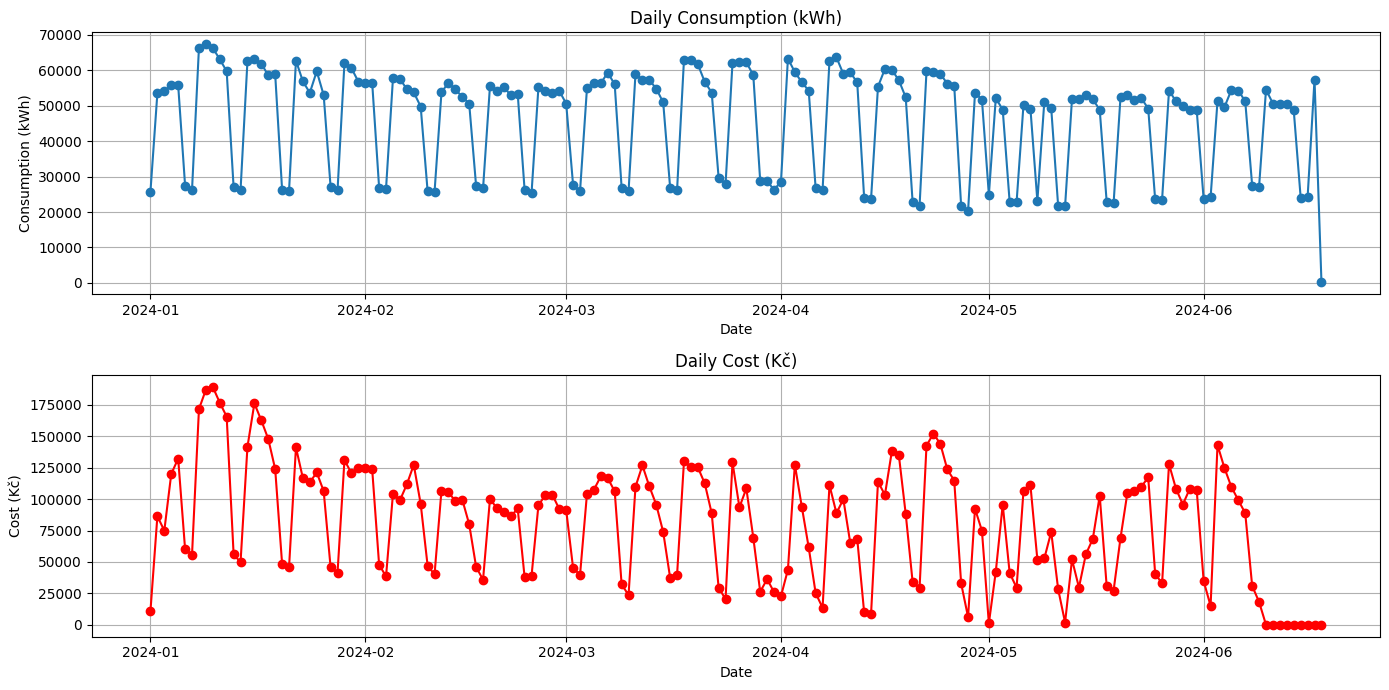

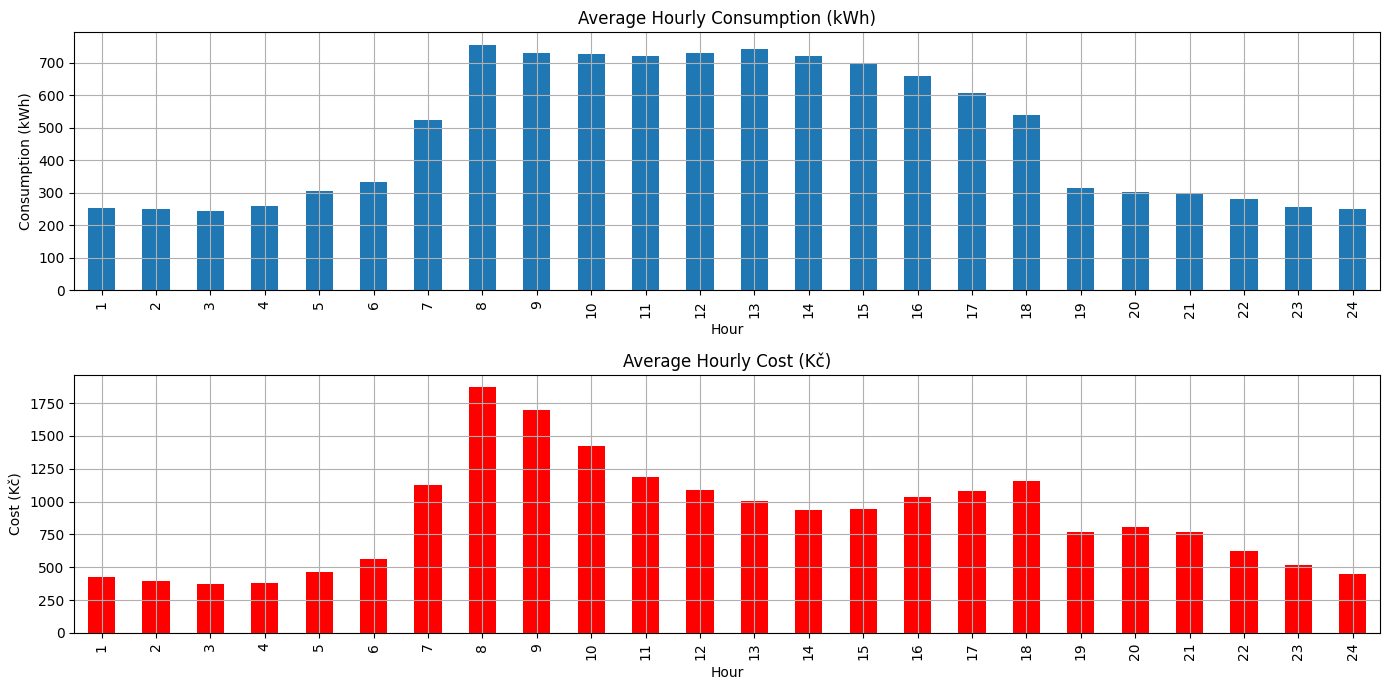

In [61]:
import matplotlib.pyplot as plt
merged_data['Cost (Kč)'] = (merged_data['Consumption_kWh'] / 1000) * merged_data['Price (Kč/MWh)']

# Save the merged data with costs
merged_data.to_csv('merged_data_with_costs.csv', index=False)

# Analysis: Identify Patterns
# Example: Daily Consumption Trend
daily_consumption = merged_data.groupby('Date')['Consumption_kWh'].sum()
daily_cost = merged_data.groupby('Date')['Cost (Kč)'].sum()

# Visualization: Daily Consumption and Cost
plt.figure(figsize=(14, 7))

# Plot Daily Consumption
plt.subplot(2, 1, 1)
daily_consumption.plot(kind='line', marker='o')
plt.title('Daily Consumption (kWh)')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.grid(True)

# Plot Daily Cost
plt.subplot(2, 1, 2)
daily_cost.plot(kind='line', marker='o', color='red')
plt.title('Daily Cost (Kč)')
plt.xlabel('Date')
plt.ylabel('Cost (Kč)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Further Analysis and Visualization
# Example: Hourly Consumption Trend
hourly_consumption = merged_data.groupby('Hour')['Consumption_kWh'].mean()
hourly_cost = merged_data.groupby('Hour')['Cost (Kč)'].mean()

plt.figure(figsize=(14, 7))

# Plot Hourly Consumption
plt.subplot(2, 1, 1)
hourly_consumption.plot(kind='bar')
plt.title('Average Hourly Consumption (kWh)')
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.grid(True)

# Plot Hourly Cost
plt.subplot(2, 1, 2)
hourly_cost.plot(kind='bar', color='red')
plt.title('Average Hourly Cost (Kč)')
plt.xlabel('Hour')
plt.ylabel('Cost (Kč)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [77]:
merged_data['Price_kWh'] = merged_data['Price (Kč/MWh)'] / 1000
merged_data['Cost (Kč)'] = merged_data['Consumption_kWh'] * merged_data['Price_kWh']
merged_data['Month'] = merged_data['Interval_Start'].dt.to_period('M')
monthly_consumption = merged_data.groupby('Month')['Consumption_kWh'].sum()
monthly_cost = merged_data.groupby('Month')['Cost (Kč)'].sum()


In [81]:
merged_data.to_csv('main_data.csv', index=False)

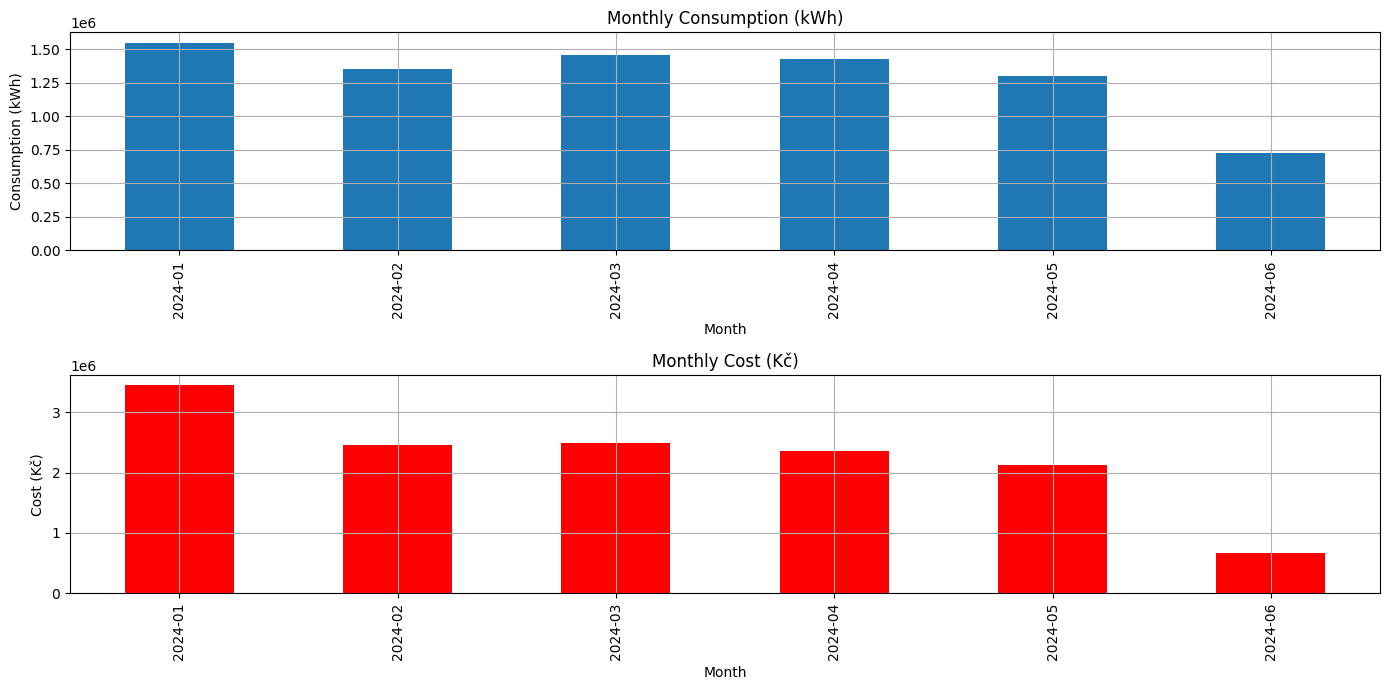

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Monthly Consumption
plt.subplot(2, 1, 1)
monthly_consumption.plot(kind='bar')
plt.title('Monthly Consumption (kWh)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.grid(True)

# Plot Monthly Cost
plt.subplot(2, 1, 2)
monthly_cost.plot(kind='bar', color='red')
plt.title('Monthly Cost (Kč)')
plt.xlabel('Month')
plt.ylabel('Cost (Kč)')
plt.grid(True)

plt.tight_layout()
plt.show()


##FULL CODE

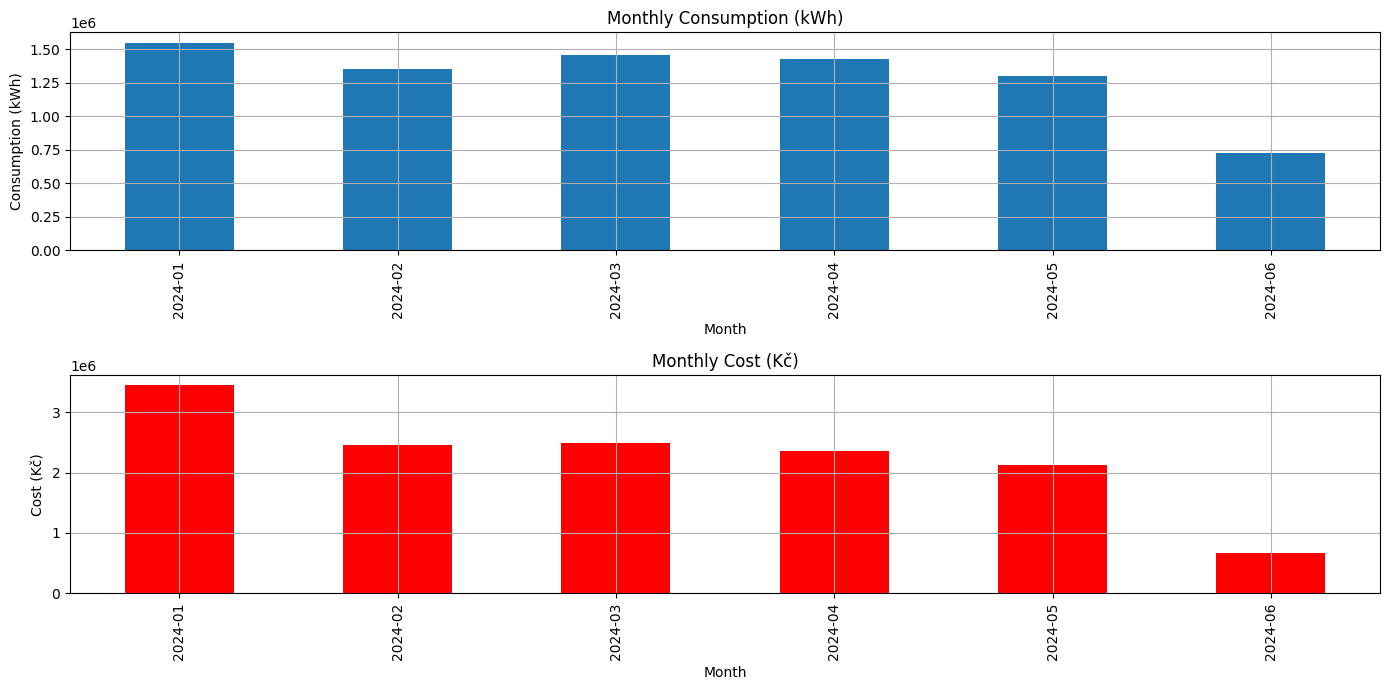

         Monthly Consumption (kWh)  Monthly Cost (Kč)
Month                                                
2024-01                    1549884       3.445108e+06
2024-02                    1352824       2.464902e+06
2024-03                    1456051       2.499169e+06
2024-04                    1431122       2.366375e+06
2024-05                    1298096       2.132177e+06


In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
consumption_data = pd.read_csv('consumption_data.csv')
spot_prices_data = pd.read_csv('spot_prices2024.csv', delimiter=';')

# Adjust the Hour column and add the Adjusted_Consumption_kWh column
consumption_data['Interval_Start'] = pd.to_datetime(consumption_data['Interval_Start'])
consumption_data['Date'] = consumption_data['Interval_Start'].dt.date
consumption_data['Hour'] = consumption_data['Hour'] + 1
consumption_data['Adjusted_Consumption_kWh'] = consumption_data['Consumption_kWh'] * 0.25

# Clean the spot prices data
spot_prices_data['Price (Kč/MWh)'] = spot_prices_data['Price (Kč/MWh)'].str.replace(' ', '').str.replace(',', '.').astype(float)
spot_prices_data['Day'] = pd.to_datetime(spot_prices_data['Day'], format='%d.%m.%Y')

# Merge the dataframes
merged_data = pd.merge(consumption_data, spot_prices_data, how='left', left_on=['Date', 'Hour'], right_on=[spot_prices_data['Day'].dt.date, 'Hour'])

# Add 'Price_kWh' column to the merged data
merged_data['Price_kWh'] = merged_data['Price (Kč/MWh)'] / 1000

# Calculate the cost for each interval using the new price
merged_data['Cost (Kč)'] = merged_data['Consumption_kWh'] * merged_data['Price_kWh']

# Add a 'Month' column for monthly analysis
merged_data['Month'] = merged_data['Interval_Start'].dt.to_period('M')

# Calculate monthly consumption and cost
monthly_consumption = merged_data.groupby('Month')['Consumption_kWh'].sum()
monthly_cost = merged_data.groupby('Month')['Cost (Kč)'].sum()

# Plotting the monthly trends
plt.figure(figsize=(14, 7))

# Plot Monthly Consumption
plt.subplot(2, 1, 1)
monthly_consumption.plot(kind='bar')
plt.title('Monthly Consumption (kWh)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.grid(True)

# Plot Monthly Cost
plt.subplot(2, 1, 2)
monthly_cost.plot(kind='bar', color='red')
plt.title('Monthly Cost (Kč)')
plt.xlabel('Month')
plt.ylabel('Cost (Kč)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Displaying the calculated monthly trends data
monthly_trends = pd.DataFrame({
    'Monthly Consumption (kWh)': monthly_consumption,
    'Monthly Cost (Kč)': monthly_cost
})

print(monthly_trends.head())
monthly_trends.to_csv('monthly_trends_with_updated_prices.csv', index=False)


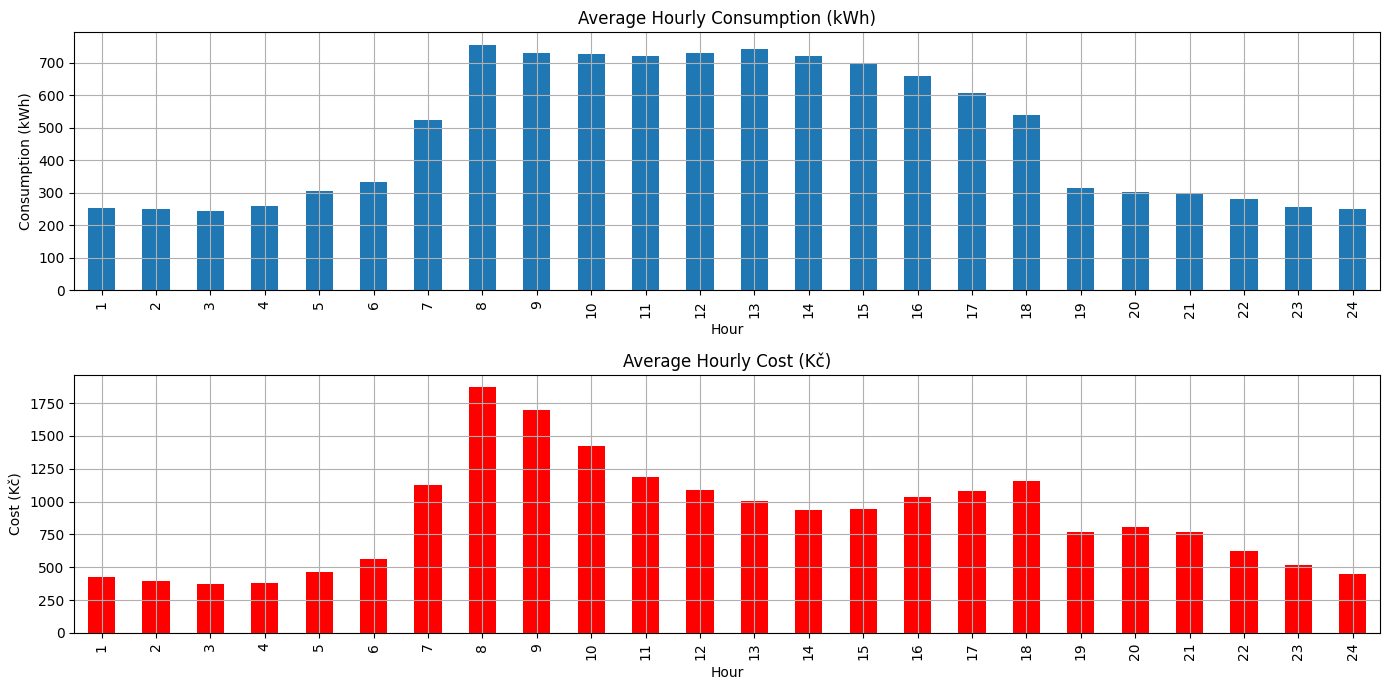

In [84]:
#2. Average Hourly Consumption and Cost Bar Plot
hourly_consumption = merged_data.groupby('Hour')['Consumption_kWh'].mean()
hourly_cost = merged_data.groupby('Hour')['Cost (Kč)'].mean()

plt.figure(figsize=(14, 7))

# Plot Hourly Consumption
plt.subplot(2, 1, 1)
hourly_consumption.plot(kind='bar')
plt.title('Average Hourly Consumption (kWh)')
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.grid(True)

# Plot Hourly Cost
plt.subplot(2, 1, 2)
hourly_cost.plot(kind='bar', color='red')
plt.title('Average Hourly Cost (Kč)')
plt.xlabel('Hour')
plt.ylabel('Cost (Kč)')
plt.grid(True)

plt.tight_layout()
plt.show()


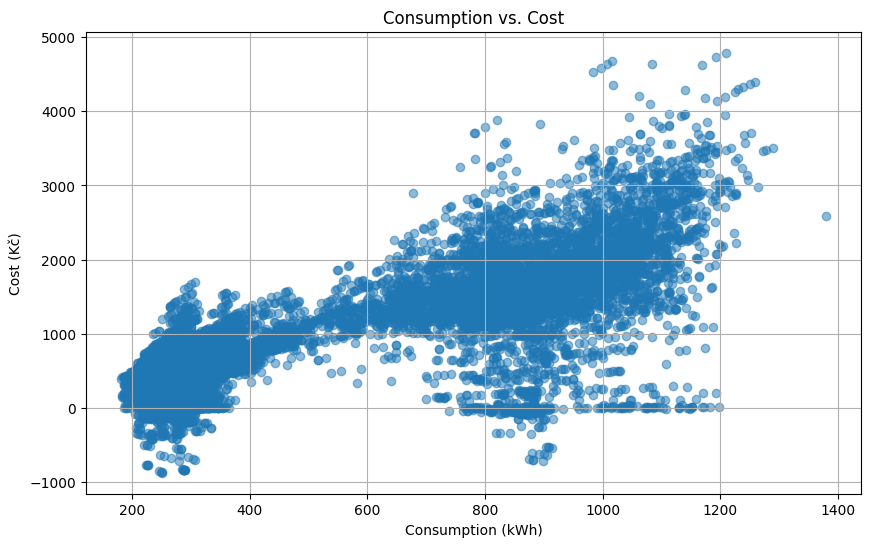

In [85]:
#Scatter Plot of Consumption vs. Cost
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Consumption_kWh'], merged_data['Cost (Kč)'], alpha=0.5)
plt.title('Consumption vs. Cost')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Cost (Kč)')
plt.grid(True)
plt.show()


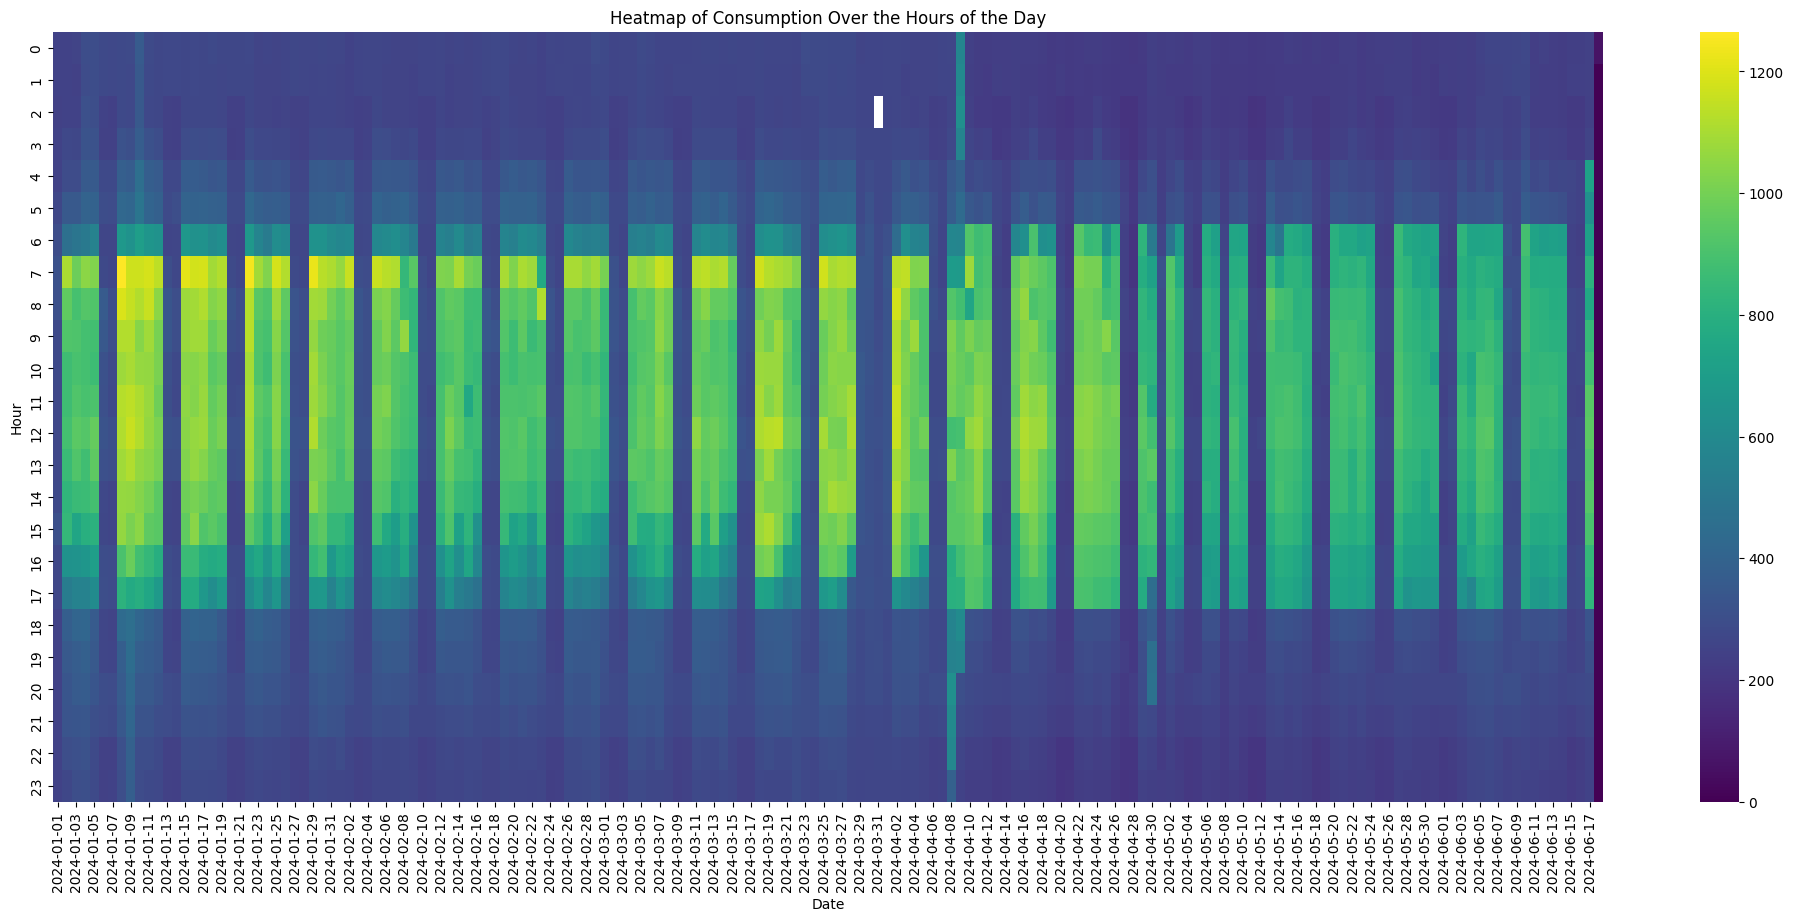

In [88]:
# 4. Heatmap of Consumption Over the Hours of the Day
import seaborn as sns
hourly_data = merged_data.pivot_table(index=merged_data['Interval_Start'].dt.hour, columns=merged_data['Interval_Start'].dt.date, values='Consumption_kWh')
plt.figure(figsize=(25, 10))
sns.heatmap(hourly_data, cmap='viridis')
plt.title('Heatmap of Consumption Over the Hours of the Day')
plt.xlabel('Date')
plt.ylabel('Hour')
plt.show()


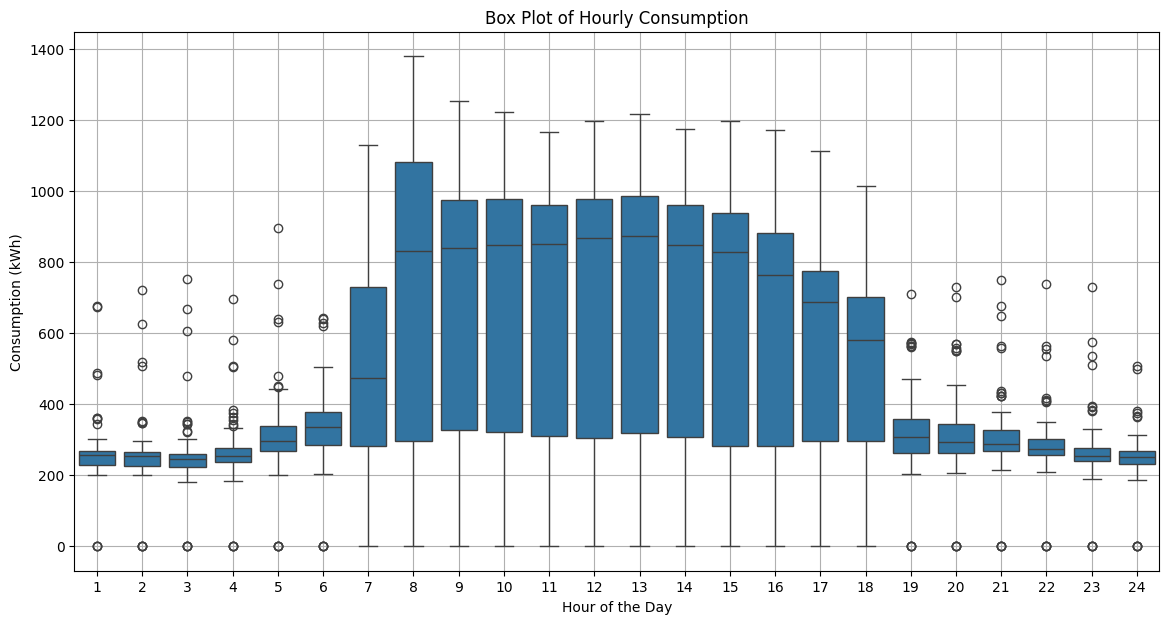

In [89]:
#5. Box Plot of Hourly Consumption

plt.figure(figsize=(14, 7))
sns.boxplot(x=merged_data['Hour'], y=merged_data['Consumption_kWh'])
plt.title('Box Plot of Hourly Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.show()


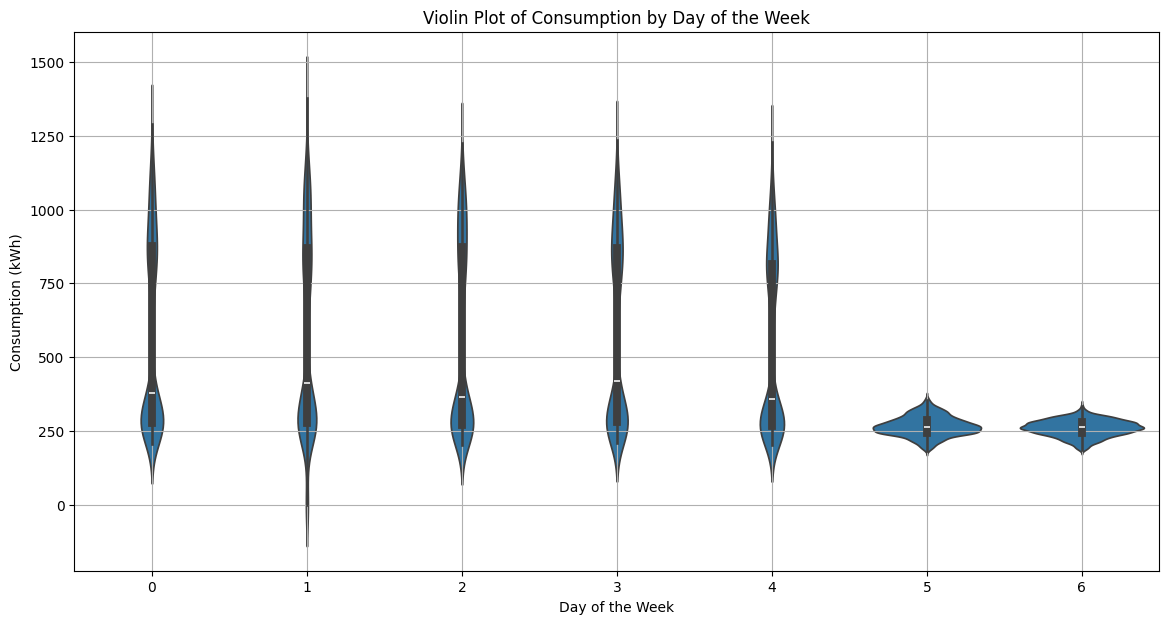

In [90]:
#6. Violin Plot of Consumption by Day of the Week
merged_data['DayOfWeek'] = merged_data['Interval_Start'].dt.dayofweek
plt.figure(figsize=(14, 7))
sns.violinplot(x='DayOfWeek', y='Consumption_kWh', data=merged_data)
plt.title('Violin Plot of Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.show()


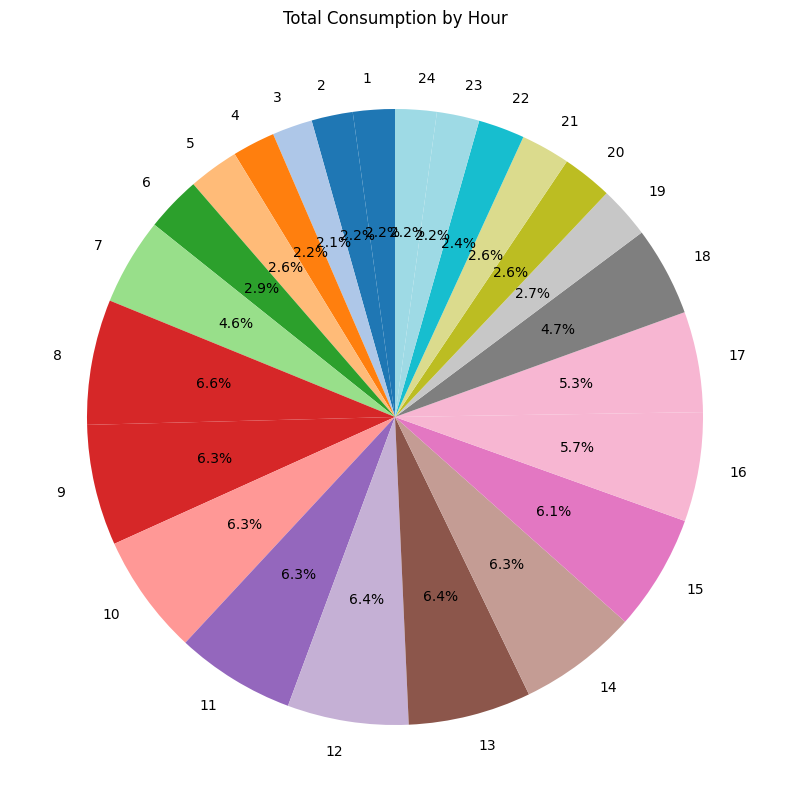

In [93]:
# 8. Pie Chart of Total Consumption by Hour
total_hourly_consumption = merged_data.groupby('Hour')['Consumption_kWh'].sum()
plt.figure(figsize=(10, 10))
total_hourly_consumption.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Total Consumption by Hour')
plt.ylabel('')
plt.show()


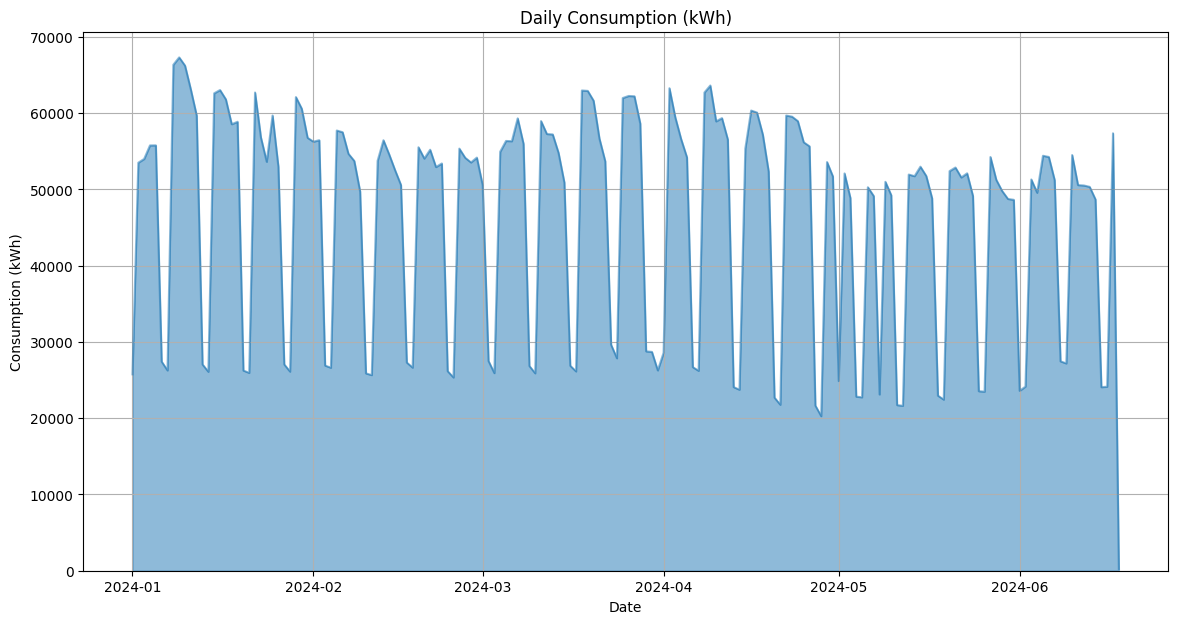

In [94]:
plt.figure(figsize=(14, 7))
daily_consumption.plot(kind='area', alpha=0.5)
plt.title('Daily Consumption (kWh)')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.show()


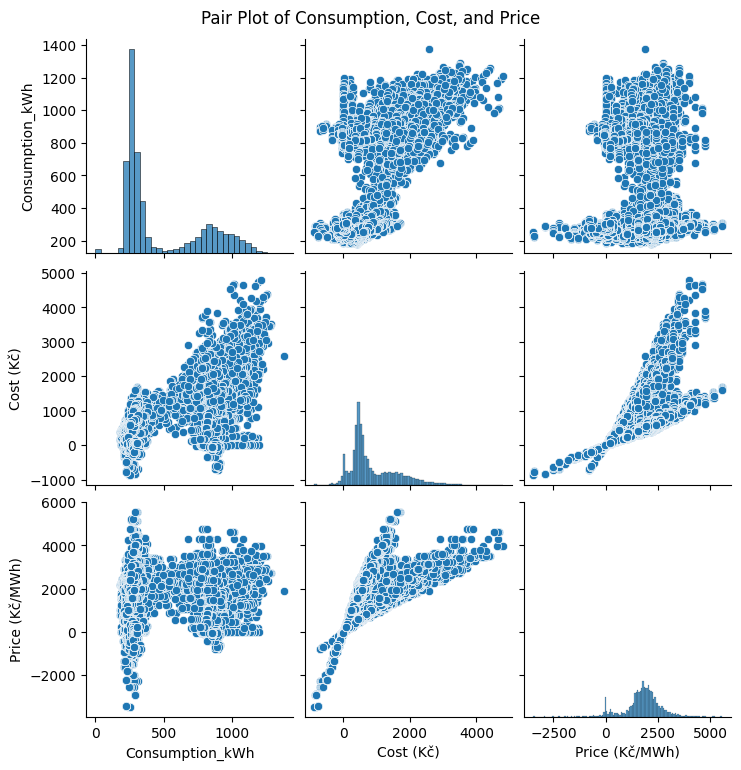

In [95]:
sns.pairplot(merged_data[['Consumption_kWh', 'Cost (Kč)', 'Price (Kč/MWh)']])
plt.suptitle('Pair Plot of Consumption, Cost, and Price', y=1.02)
plt.show()


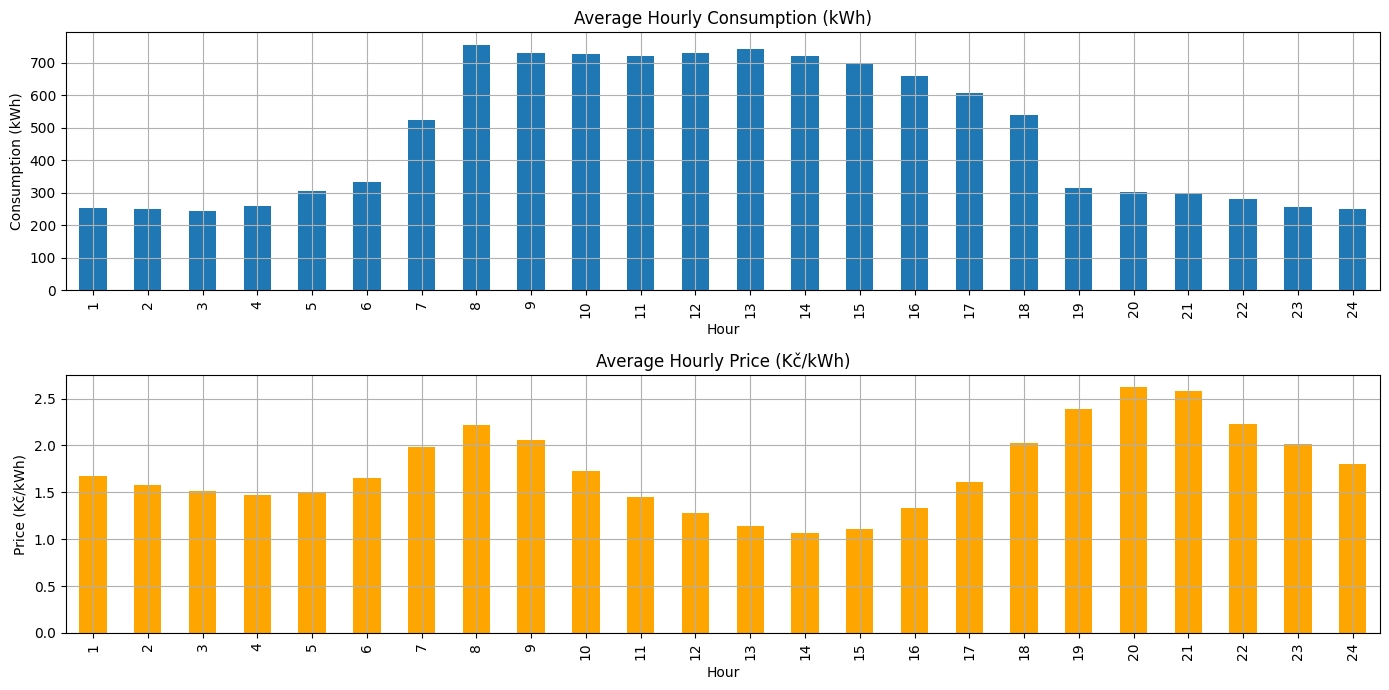

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is already created and cleaned as shown in previous steps

# Calculate average hourly consumption and price
hourly_consumption = merged_data.groupby('Hour')['Consumption_kWh'].mean()
hourly_price = merged_data.groupby('Hour')['Price_kWh'].mean()

plt.figure(figsize=(14, 7))

# Plot Average Hourly Consumption
plt.subplot(2, 1, 1)
hourly_consumption.plot(kind='bar')
plt.title('Average Hourly Consumption (kWh)')
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.grid(True)

# Plot Average Hourly Price
plt.subplot(2, 1, 2)
hourly_price.plot(kind='bar', color='orange')
plt.title('Average Hourly Price (Kč/kWh)')
plt.xlabel('Hour')
plt.ylabel('Price (Kč/kWh)')
plt.grid(True)

plt.tight_layout()
plt.show()


<Figure size 2000x1200 with 0 Axes>

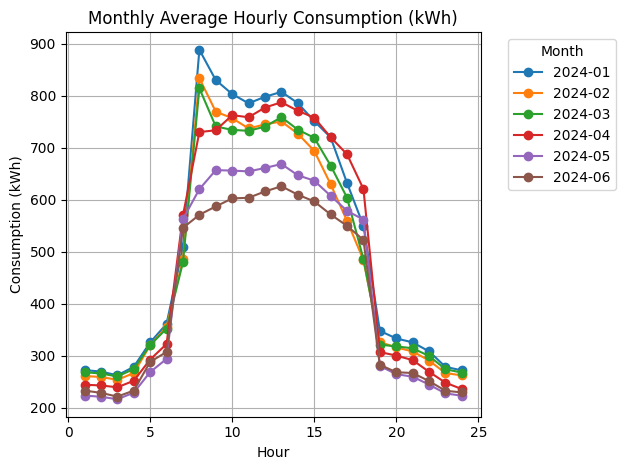

In [98]:
monthly_hourly_consumption = merged_data.groupby(['Month', 'Hour'])['Consumption_kWh'].mean().unstack()

plt.figure(figsize=(20, 12))
monthly_hourly_consumption.T.plot(kind='line', marker='o')
plt.title('Monthly Average Hourly Consumption (kWh)')
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


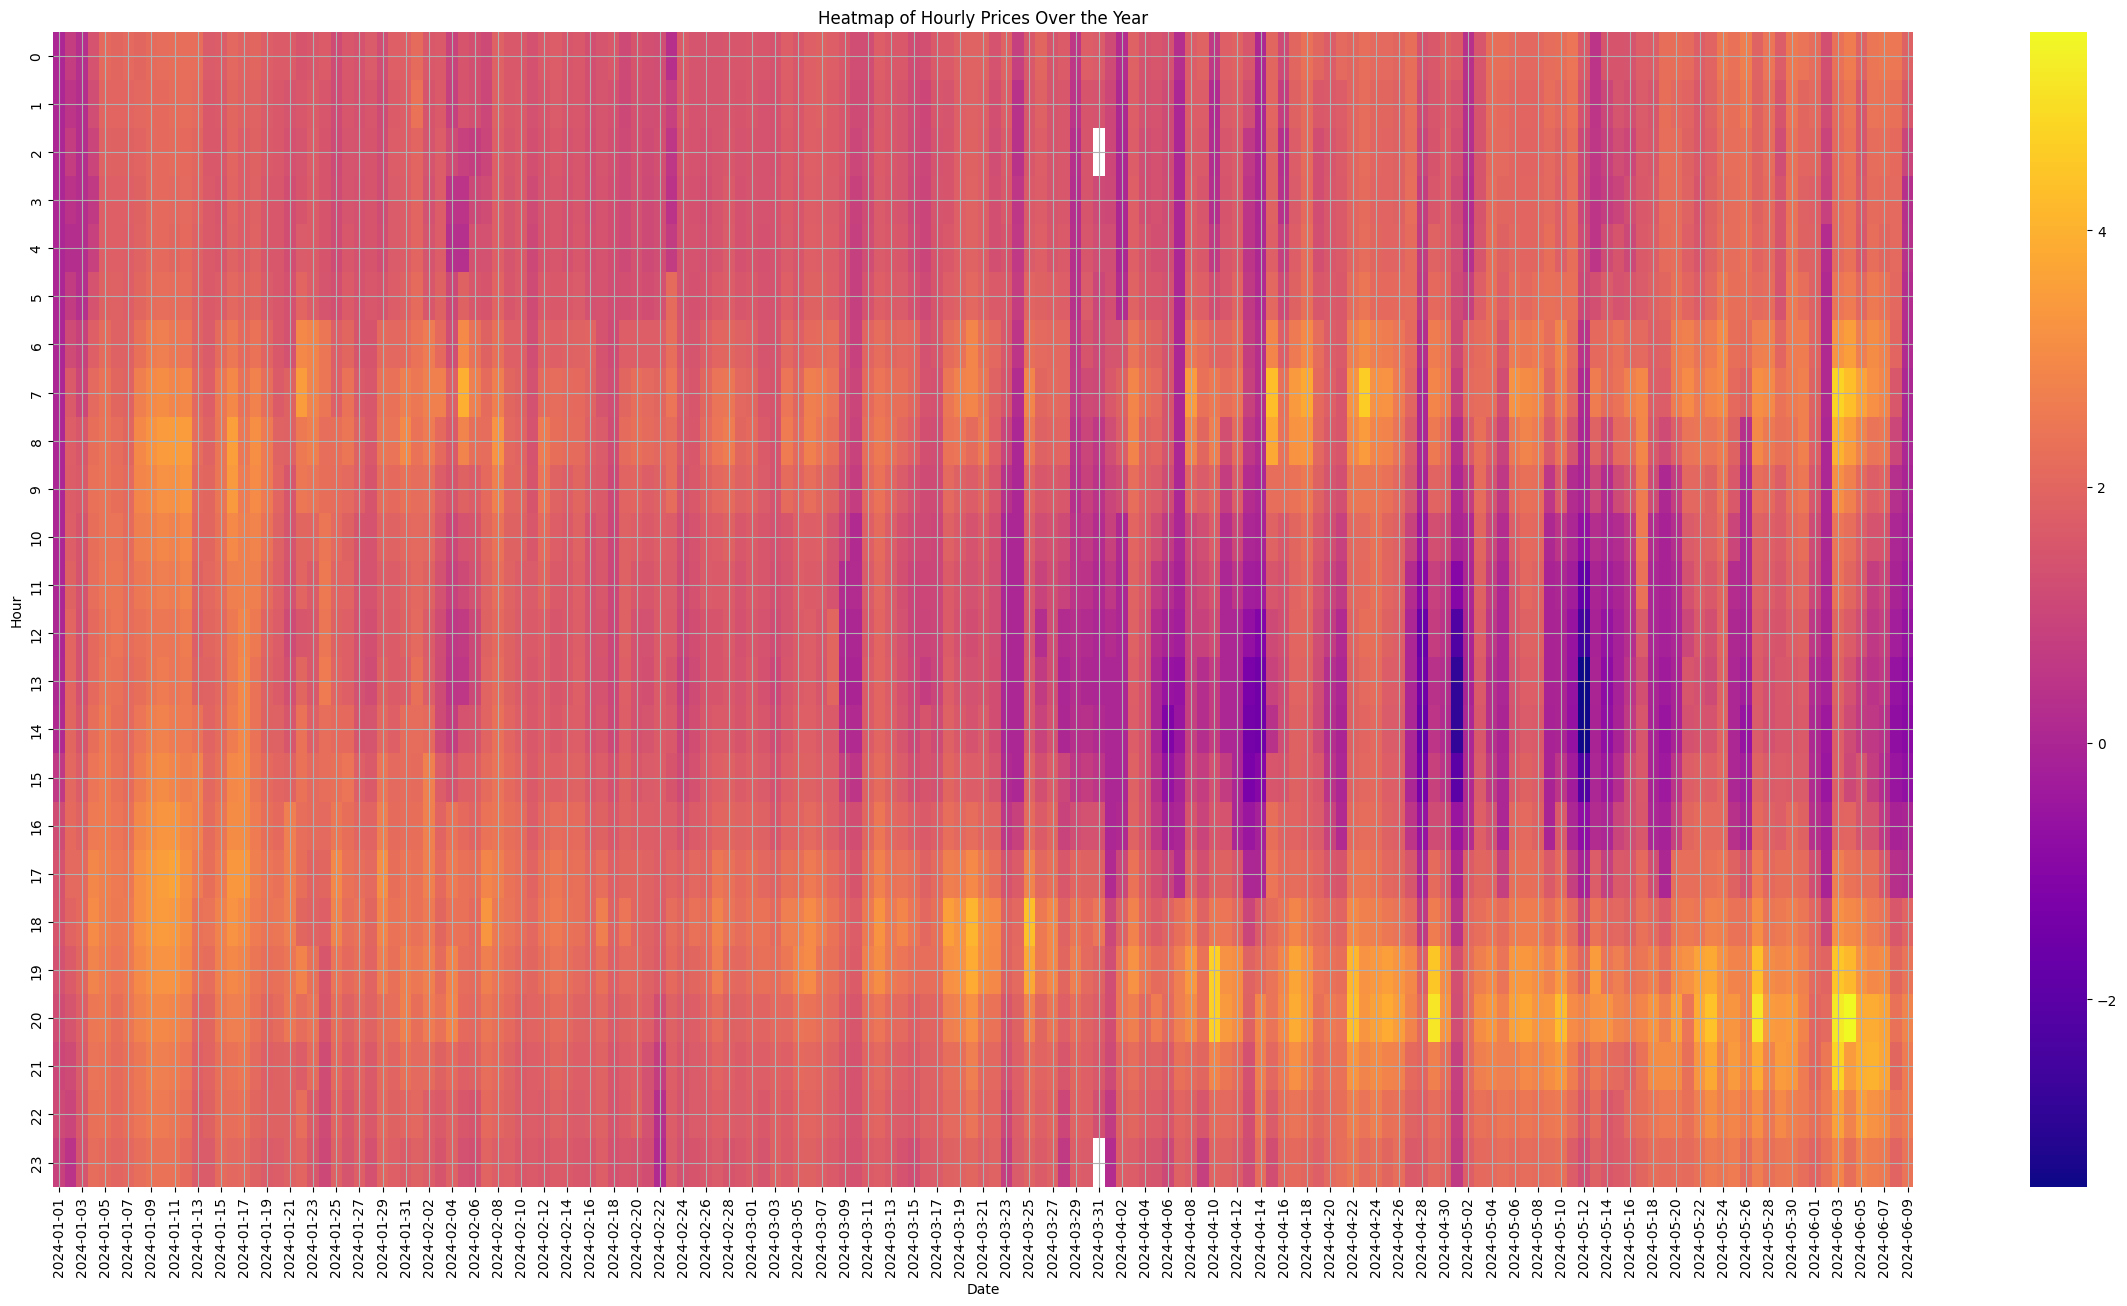

In [105]:
hourly_price_data = merged_data.pivot_table(index=merged_data['Interval_Start'].dt.hour, columns=merged_data['Interval_Start'].dt.date, values='Price_kWh')

plt.figure(figsize=(30, 15))
sns.heatmap(hourly_price_data, cmap='plasma')
plt.title('Heatmap of Hourly Prices Over the Year')
plt.xlabel('Date')

plt.grid(True)

plt.ylabel('Hour')
plt.show()


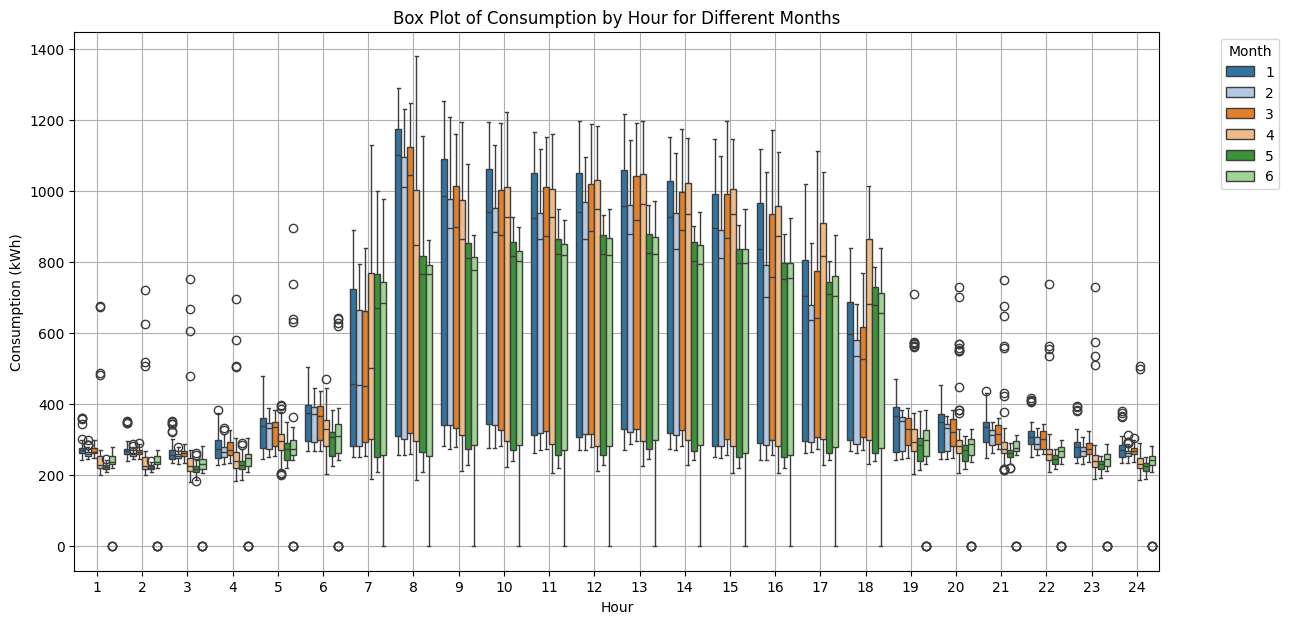

In [106]:
merged_data['Month'] = merged_data['Interval_Start'].dt.month

plt.figure(figsize=(14, 7))
sns.boxplot(x='Hour', y='Consumption_kWh', hue='Month', data=merged_data, palette='tab20')
plt.title('Box Plot of Consumption by Hour for Different Months')
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [149]:
merged_data

,index,Interval_Start,Interval_End,Consumption_kW,Consumption_kWh,Hour,Time,Date,Adjusted_Consumption_kWh,Day,Price (Kč/MWh),Price_kWh,Cost (Kč),Month,DayOfWeek,Fixed_Cost (Kč),Cost_Difference (Kč),Savings,Elasticity,Season
0,0,2024-01-01 00:00:00,2024-01-01 00:15:00,242,242,1,00:00:00,2024-01-01,60.50,2024-01-01,2.47,0.00247,0.59774,1,0,151.250,150.65226,-725.40226,-0.914284,Summer
1,1,2024-01-01 00:15:00,2024-01-01 00:30:00,254,254,1,00:15:00,2024-01-01,63.50,2024-01-01,2.47,0.00247,0.62738,1,0,158.750,158.12262,-761.37262,-0.922345,Summer
2,2,2024-01-01 00:30:00,2024-01-01 00:45:00,252,252,1,00:30:00,2024-01-01,63.00,2024-01-01,2.47,0.00247,0.62244,1,0,157.500,156.87756,-755.37756,-0.921029,Summer
3,3,2024-01-01 00:45:00,2024-01-01 01:00:00,251,251,1,00:45:00,2024-01-01,62.75,2024-01-01,2.47,0.00247,0.61997,1,0,156.875,156.25503,-752.38003,-0.920366,Summer
4,4,2024-01-01 01:00:00,2024-01-01 01:15:00,243,243,2,01:00:00,2024-01-01,60.75,2024-01-01,0.25,0.00025,0.06075,1,0,151.875,151.81425,-728.93925,-0.662289,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,16311,2024-06-18 22:45:00,2024-06-18 23:00:00,0,0,23,22:45:00,2024-06-18,0.00,NaT,NaN,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter
16312,16312,2024-06-18 23:00:00,2024-06-18 23:15:00,0,0,24,23:00:00,2024-06-18,0.00,NaT,NaN,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter
16313,16313,2024-06-18 23:15:00,2024-06-18 23:30:00,0,0,24,23:15:00,2024-06-18,0.00,NaT,NaN,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter
16314,16314,2024-06-18 23:30:00,2024-06-18 23:45:00,0,0,24,23:30:00,2024-06-18,0.00,NaT,NaN,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter


In [177]:
# create a new column Price_consumed_kWh that is going to take values from "Adjusted_Consumption_kWh" and multiply by "Price_kWh"
merged_data['Price_for_consumed_kWh'] = merged_data['Adjusted_Consumption_kWh'] * merged_data['Price_kWh']
merged_data

,index,Interval_Start,Interval_End,Consumption_kW,Consumption_kWh,Hour,Time,Date,Adjusted_Consumption_kWh,Day,Price (Kč/MWh),Price_kWh,Month,DayOfWeek,Fixed_Cost (Kč),Cost_Difference (Kč),Savings,Elasticity,Season,Price_for_consumed_kWh
0,0,2024-01-01 00:00:00,2024-01-01 00:15:00,242,242,1,00:00:00,2024-01-01,60.50,2024-01-01,2.47,0.00247,1,0,151.250,150.65226,-725.40226,-0.914284,Summer,0.149435
1,1,2024-01-01 00:15:00,2024-01-01 00:30:00,254,254,1,00:15:00,2024-01-01,63.50,2024-01-01,2.47,0.00247,1,0,158.750,158.12262,-761.37262,-0.922345,Summer,0.156845
2,2,2024-01-01 00:30:00,2024-01-01 00:45:00,252,252,1,00:30:00,2024-01-01,63.00,2024-01-01,2.47,0.00247,1,0,157.500,156.87756,-755.37756,-0.921029,Summer,0.155610
3,3,2024-01-01 00:45:00,2024-01-01 01:00:00,251,251,1,00:45:00,2024-01-01,62.75,2024-01-01,2.47,0.00247,1,0,156.875,156.25503,-752.38003,-0.920366,Summer,0.154993
4,4,2024-01-01 01:00:00,2024-01-01 01:15:00,243,243,2,01:00:00,2024-01-01,60.75,2024-01-01,0.25,0.00025,1,0,151.875,151.81425,-728.93925,-0.662289,Summer,0.015187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,16311,2024-06-18 22:45:00,2024-06-18 23:00:00,0,0,23,22:45:00,2024-06-18,0.00,NaT,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter,NaN
16312,16312,2024-06-18 23:00:00,2024-06-18 23:15:00,0,0,24,23:00:00,2024-06-18,0.00,NaT,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter,NaN
16313,16313,2024-06-18 23:15:00,2024-06-18 23:30:00,0,0,24,23:15:00,2024-06-18,0.00,NaT,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter,NaN
16314,16314,2024-06-18 23:30:00,2024-06-18 23:45:00,0,0,24,23:30:00,2024-06-18,0.00,NaT,NaN,NaN,6,1,0.000,NaN,NaN,NaN,Winter,NaN


In [201]:
# sum all the "Cost (Kč)" values 
total_cost = merged_data['Price_for_consumed_kWh'].sum()
total_forward_cost = merged_data["Fixed_Cost (Kč)"].sum()
total_cost_difference = total_cost - total_forward_cost
print("Celková cena za období na SPOTu = " +str(total_cost) +" Kč")
print("Celková cena za období na FORWARDu = " +str(total_forward_cost) +" Kč")
print("Celkem rozdíl mezi SPOT a FORWARD ( SPOT - FORWARD) = " +str(total_cost_difference) +" Kč")
#print price difference between SPOT and FORWARD and say if it is positive or negative
if total_cost_difference > 0:
    print("Rozdíl mezi SPOT a FORWARD je kladný, tedy SPOT je o " + str(total_cost_difference)+ "dražší  než FORWARD")
else :
    print("Rozdíl mezi SPOT a FORWARD je záporný, tedy SPOT je levnější o " + str(total_cost_difference)+ " Kč než FORWARD")

Celková cena za období na SPOTu = 3393068.3447975 Kč
Celková cena za období na FORWARDu = 4882237.5 Kč
Celkem rozdíl mezi SPOT a FORWARD ( SPOT - FORWARD) = -1489169.1552025 Kč
Rozdíl mezi SPOT a FORWARD je záporný, tedy SPOT je levnější o -1489169.1552025 Kč než FORWARD


In [185]:
print("Celkem spotřeba = " + str(total_consumption) + " kW/kWh")


Celkem spotřeba = 1952895.0 kW/kWh


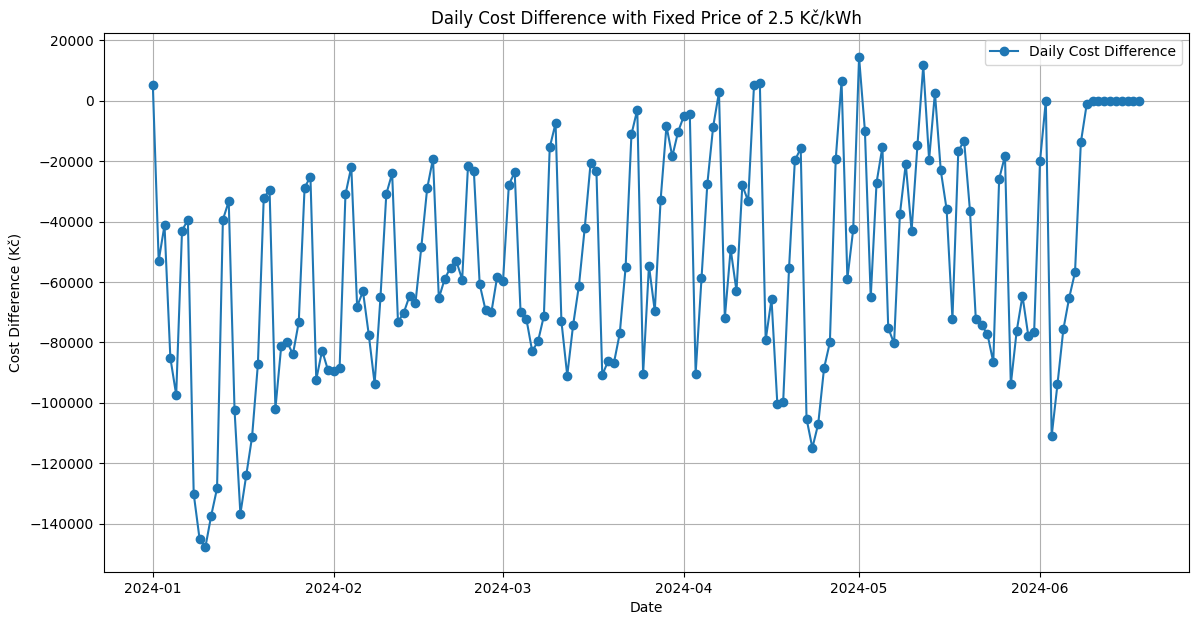

In [188]:
# Example fixed price in Kč/kWh
if 'Cost (Kč)' in merged_data.columns:
    merged_data['Cost_Difference (Kč)'] = merged_data['Fixed_Cost (Kč)'].astype(int) - merged_data['Cost (Kč)'].astype(float)
else:
    merged_data['Cost_Difference (Kč)'] = 0

plt.figure(figsize=(14, 7))
daily_cost_diff.plot(kind='line', marker='o', label='Daily Cost Difference')
plt.title(f'Daily Cost Difference with Fixed Price of {fixed_price} Kč/kWh')
plt.xlabel('Date')
plt.ylabel('Cost Difference (Kč)')
plt.grid(True)
plt.legend()
plt.show()


In [189]:
daily_cost_diff

Date
2024-01-01     5152.08018
2024-01-02   -52954.91330
2024-01-03   -41196.77870
2024-01-04   -85102.04199
2024-01-05   -97380.45803
                 ...     
2024-06-14        0.00000
2024-06-15        0.00000
2024-06-16        0.00000
2024-06-17        0.00000
2024-06-18        0.00000
Name: Cost_Difference (Kč), Length: 170, dtype: float64

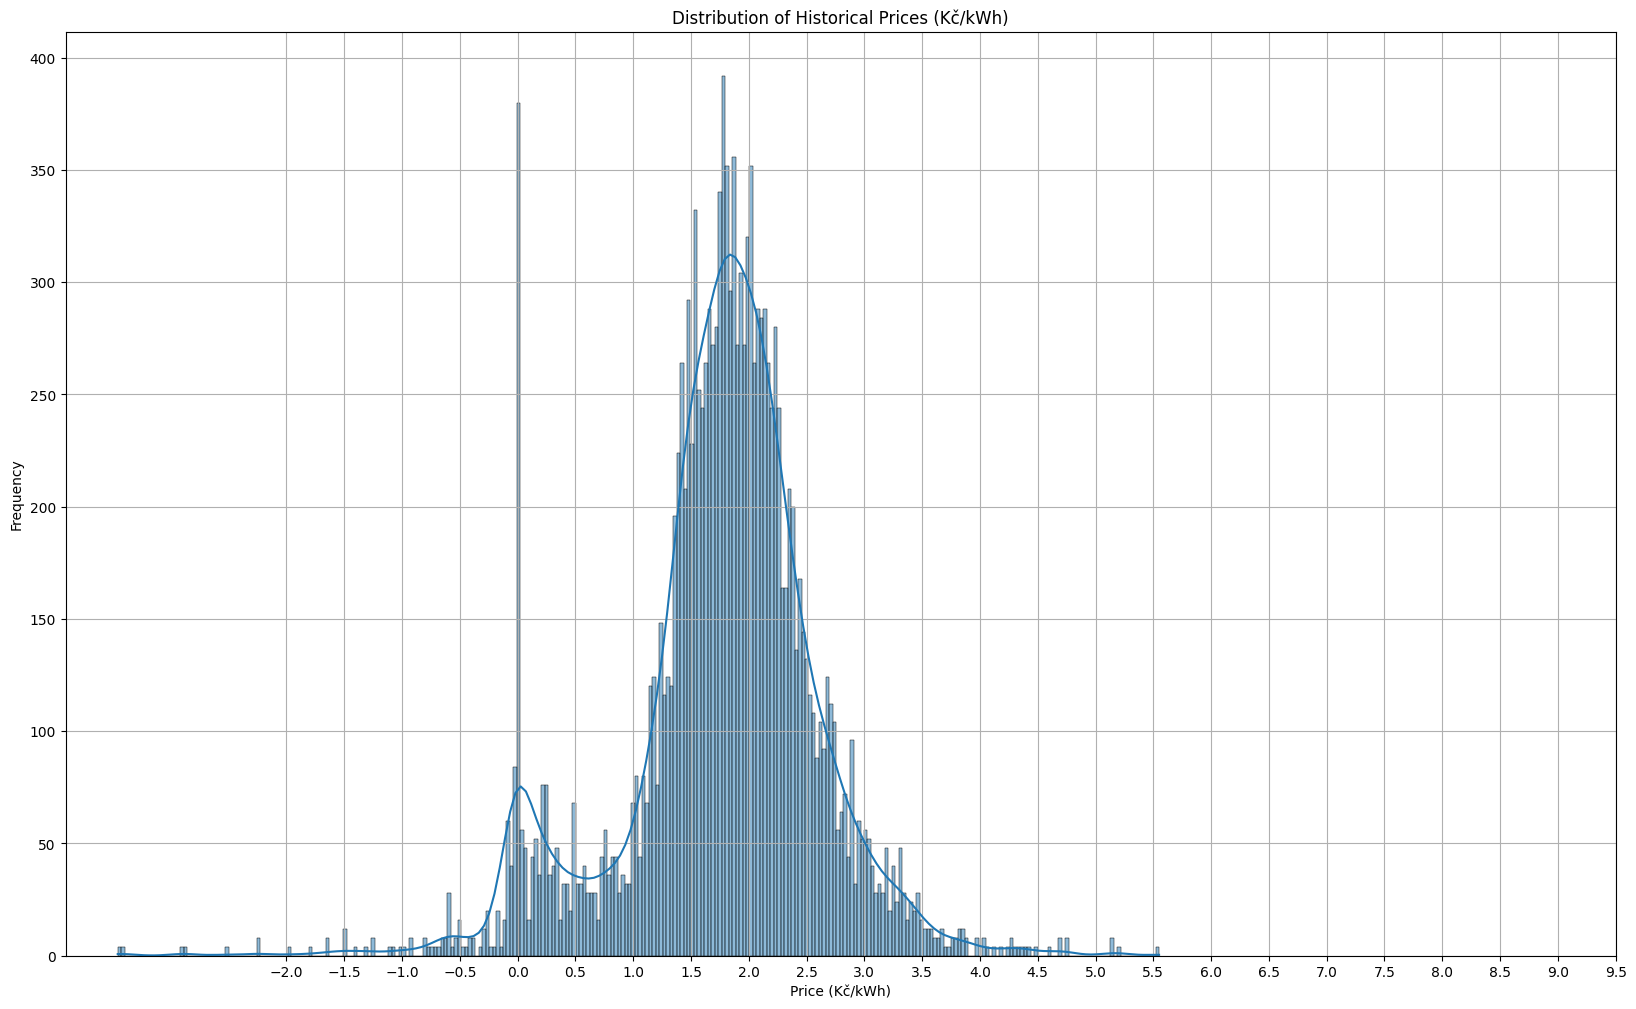

In [138]:
plt.figure(figsize=(20, 12))
sns.histplot(merged_data['Price_kWh'], bins=300, kde=True)
plt.title('Distribution of Historical Prices (Kč/kWh)')
# add labes to the x axis
plt.xticks(np.arange(-2,10, 0.5))
plt.xlabel('Price (Kč/kWh)', )
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The break-even fixed price is approximately: 1.80 Kč/kWh


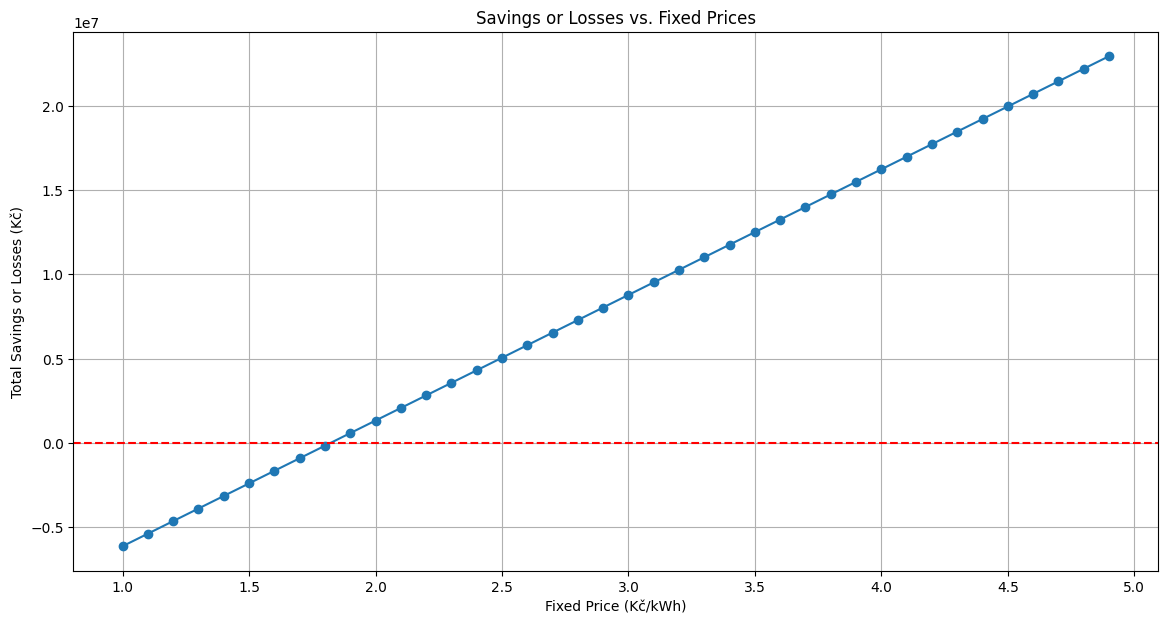

In [110]:
import numpy as np

# Define a range of fixed prices to test
fixed_price_range = np.arange(1.0, 5.0, 0.1)

# Calculate total savings or losses for each fixed price
savings_or_losses = []
for price in fixed_price_range:
    merged_data['Fixed_Cost (Kč)'] = merged_data['Consumption_kWh'] * price
    merged_data['Cost_Difference (Kč)'] = merged_data['Fixed_Cost (Kč)'] - merged_data['Cost (Kč)']
    total_savings_or_losses = merged_data['Cost_Difference (Kč)'].sum()
    savings_or_losses.append(total_savings_or_losses)

# Find the break-even price (closest to zero savings or losses)
break_even_price = fixed_price_range[np.argmin(np.abs(savings_or_losses))]
print(f'The break-even fixed price is approximately: {break_even_price:.2f} Kč/kWh')

# Plot savings or losses against fixed prices
plt.figure(figsize=(14, 7))
plt.plot(fixed_price_range, savings_or_losses, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Savings or Losses vs. Fixed Prices')
plt.xlabel('Fixed Price (Kč/kWh)')
plt.ylabel('Total Savings or Losses (Kč)')
plt.grid(True)
plt.show()


In [132]:
prebuy_price = 3  # Example prebuy price in Kč/kWh

# Calculate potential savings
merged_data['Savings'] = (merged_data['Price_kWh'] - prebuy_price) * merged_data['Consumption_kWh']
total_savings = merged_data['Savings'].sum()
average_savings = merged_data['Savings'].mean()

print(f"Total Savings with Prebuy Price {prebuy_price} Kč/kWh: {total_savings:.2f} Kč")
print(f"Average Savings per Interval: {average_savings:.4f} Kč")


Total Savings with Prebuy Price 3 Kč/kWh: -8777957.62 Kč
Average Savings per Interval: -568.2262 Kč


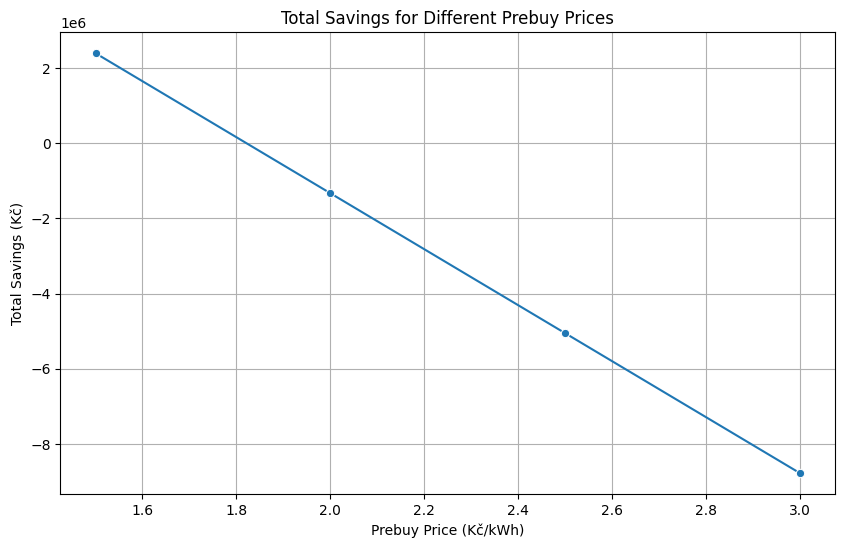

   Prebuy Price (Kč/kWh)  Total Savings (Kč)  Average Savings (Kč)
0                    1.5        2.397158e+06            155.175937
1                    2.0       -1.327881e+06            -85.958093
2                    2.5       -5.052919e+06           -327.092123
3                    3.0       -8.777958e+06           -568.226154


In [136]:
prebuy_prices = [1.5, 2.0, 2.5, 3.0]

savings_summary = []

for price in prebuy_prices:
    merged_data['Savings'] = (merged_data['Price_kWh'] - price) * merged_data['Consumption_kWh']
    total_savings = merged_data['Savings'].sum()
    average_savings = merged_data['Savings'].mean()
    savings_summary.append({
        'Prebuy Price (Kč/kWh)': price,
        'Total Savings (Kč)': total_savings,
        'Average Savings (Kč)': average_savings
    })

savings_df = pd.DataFrame(savings_summary)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Prebuy Price (Kč/kWh)', y='Total Savings (Kč)', data=savings_df, marker='o')
plt.title('Total Savings for Different Prebuy Prices')
plt.xlabel('Prebuy Price (Kč/kWh)')
plt.ylabel('Total Savings (Kč)')
plt.grid(True)
plt.show()

print(savings_df)



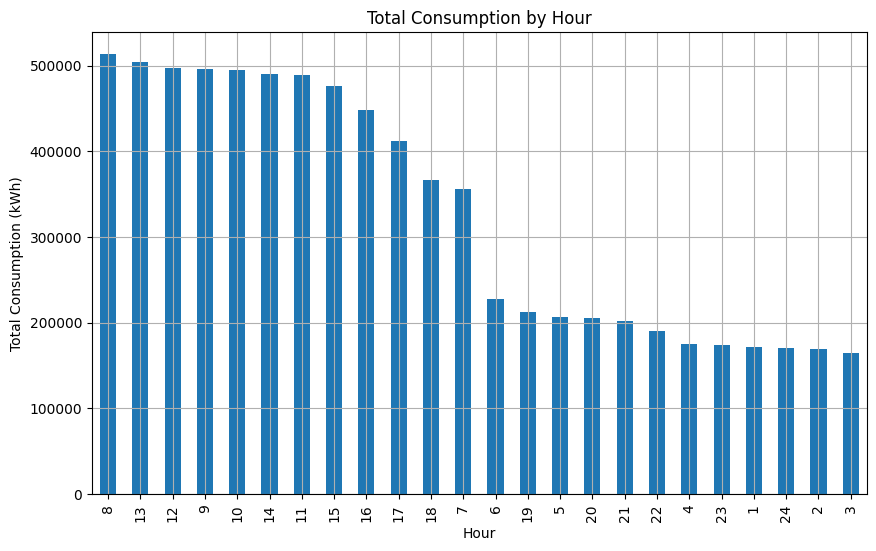

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is already created and cleaned as shown in previous steps

# Group by Hour to find peak consumption hours
peak_hours = merged_data.groupby('Hour')['Consumption_kWh'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar')
plt.title('Total Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Consumption (kWh)')
plt.grid(True)
plt.show()


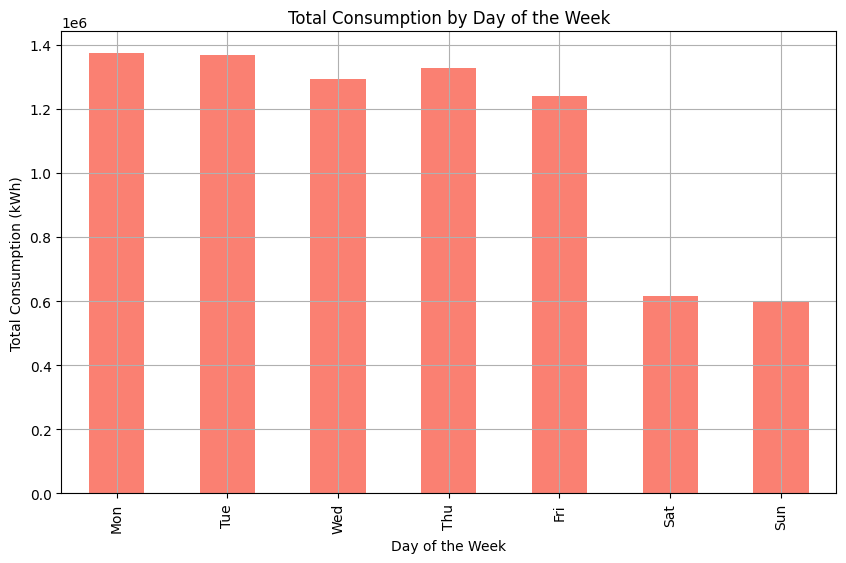

In [142]:
merged_data['DayOfWeek'] = merged_data['Interval_Start'].dt.dayofweek
weekly_consumption = merged_data.groupby('DayOfWeek')['Consumption_kWh'].sum()

plt.figure(figsize=(10, 6))
weekly_consumption.plot(kind='bar', color='salmon')
plt.title('Total Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Consumption (kWh)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()


In [210]:
#remove rows 15454 to 16318 from merged_data
merged_data = merged_data.drop(merged_data.index[15452:15454])


In [221]:
#load merged data from MAIN_merged_data.csv
merged_data = pd.read_csv('MAIN_merged_data_cleaned.csv')
merged_data

,index,Interval_Start,Interval_End,Consumption_kW,Consumption_kWh,Hour,Time,Date,Adjusted_Consumption_kWh,Day,Price (Kč/MWh),Price_kWh,Month,DayOfWeek,Fixed_Cost (Kč),Cost_Difference (Kč),Savings,Elasticity,Season,Price_for_consumed_kWh
0,0,2024-01-01 00:00:00,2024-01-01 00:15:00,242,242,1,00:00:00,2024-01-01,60.50,2024-01-01,2.47,0.00247,1,0,484.0,0,-725.40226,-0.914284,Summer,0.149435
1,1,2024-01-01 00:15:00,2024-01-01 00:30:00,254,254,1,00:15:00,2024-01-01,63.50,2024-01-01,2.47,0.00247,1,0,508.0,0,-761.37262,-0.922345,Summer,0.156845
2,2,2024-01-01 00:30:00,2024-01-01 00:45:00,252,252,1,00:30:00,2024-01-01,63.00,2024-01-01,2.47,0.00247,1,0,504.0,0,-755.37756,-0.921029,Summer,0.155610
3,3,2024-01-01 00:45:00,2024-01-01 01:00:00,251,251,1,00:45:00,2024-01-01,62.75,2024-01-01,2.47,0.00247,1,0,502.0,0,-752.38003,-0.920366,Summer,0.154993
4,4,2024-01-01 01:00:00,2024-01-01 01:15:00,243,243,2,01:00:00,2024-01-01,60.75,2024-01-01,0.25,0.00025,1,0,486.0,0,-728.93925,-0.662289,Summer,0.015187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15447,15447,2024-06-09 22:45:00,2024-06-09 23:00:00,258,258,23,22:45:00,2024-06-09,64.50,2024-06-09,2661.96,2.66196,6,6,516.0,0,-87.21432,5.671710,Winter,171.696420
15448,15448,2024-06-09 23:00:00,2024-06-09 23:15:00,256,256,24,23:00:00,2024-06-09,64.00,2024-06-09,2392.87,2.39287,6,6,512.0,0,-155.42528,6.355552,Winter,153.143680
15449,15449,2024-06-09 23:15:00,2024-06-09 23:30:00,254,254,24,23:15:00,2024-06-09,63.50,2024-06-09,2392.87,2.39287,6,6,508.0,0,-154.21102,6.346562,Winter,151.947245
15450,15450,2024-06-09 23:30:00,2024-06-09 23:45:00,254,254,24,23:30:00,2024-06-09,63.50,2024-06-09,2392.87,2.39287,6,6,508.0,0,-154.21102,6.346562,Winter,151.947245


In [227]:
#drop column "Fixed_Cost (Kč)"

merged_data = merged_data.drop(columns=['Elasticity'])
merged_data = merged_data.drop(columns=['Cost_Difference (Kč)'])

In [229]:
merged_data = merged_data.drop(columns=['Consumption_kWh'])

In [ ]:
merged_data["Cost on FORWARD"] = merged_data["Adjusted_Consumption_kWh"] * 2.5


In [233]:
# rename column "Price_for_consumed_kWh" to "Cost on SPOT" 
merged_data.rename(columns = {'Price_for_consumed_kWh':'Cost on SPOT'}, inplace = True)



In [235]:
#add column "Price_difference" that is going to take values from "Cost on FORWARD" and subtract "Cost on SPOT"
merged_data["Price_difference"] = merged_data["Cost on FORWARD"] - merged_data["Cost on SPOT"]


In [245]:
merged_data

,index,Interval_Start,Interval_End,Consumption_kW,Hour,Time,Date,Adjusted_Consumption_kWh,Day,Price (Kč/MWh),Price_kWh,Month,DayOfWeek,Savings,Season,Cost on SPOT,Cost on FORWARD,Price_difference
0,0,2024-01-01 00:00:00,2024-01-01 00:15:00,242,1,00:00:00,2024-01-01,60.50,2024-01-01,2.47,0.00247,1,0,-725.40226,Summer,0.149435,151.250,151.100565
1,1,2024-01-01 00:15:00,2024-01-01 00:30:00,254,1,00:15:00,2024-01-01,63.50,2024-01-01,2.47,0.00247,1,0,-761.37262,Summer,0.156845,158.750,158.593155
2,2,2024-01-01 00:30:00,2024-01-01 00:45:00,252,1,00:30:00,2024-01-01,63.00,2024-01-01,2.47,0.00247,1,0,-755.37756,Summer,0.155610,157.500,157.344390
3,3,2024-01-01 00:45:00,2024-01-01 01:00:00,251,1,00:45:00,2024-01-01,62.75,2024-01-01,2.47,0.00247,1,0,-752.38003,Summer,0.154993,156.875,156.720008
4,4,2024-01-01 01:00:00,2024-01-01 01:15:00,243,2,01:00:00,2024-01-01,60.75,2024-01-01,0.25,0.00025,1,0,-728.93925,Summer,0.015187,151.875,151.859813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15447,15447,2024-06-09 22:45:00,2024-06-09 23:00:00,258,23,22:45:00,2024-06-09,64.50,2024-06-09,2661.96,2.66196,6,6,-87.21432,Winter,171.696420,161.250,-10.446420
15448,15448,2024-06-09 23:00:00,2024-06-09 23:15:00,256,24,23:00:00,2024-06-09,64.00,2024-06-09,2392.87,2.39287,6,6,-155.42528,Winter,153.143680,160.000,6.856320
15449,15449,2024-06-09 23:15:00,2024-06-09 23:30:00,254,24,23:15:00,2024-06-09,63.50,2024-06-09,2392.87,2.39287,6,6,-154.21102,Winter,151.947245,158.750,6.802755
15450,15450,2024-06-09 23:30:00,2024-06-09 23:45:00,254,24,23:30:00,2024-06-09,63.50,2024-06-09,2392.87,2.39287,6,6,-154.21102,Winter,151.947245,158.750,6.802755


In [249]:
print(merged_data.columns)

Index(['index', 'Interval_Start', 'Interval_End', 'Consumption_kW', 'Hour',
       'Time', 'Date', 'Adjusted_Consumption_kWh', 'Day', 'Price (Kč/MWh)',
       'Price_kWh', 'Month', 'DayOfWeek', 'Savings', 'Season', 'Cost on SPOT',
       'Cost on FORWARD', 'Price_difference'],
      dtype='object')


In [252]:
import plotly.express as px
import plotly.graph_objects as go   

hourly_data = merged_data.pivot_table(index=merged_data['Interval_Start'].dt.hour, columns=merged_data['Interval_Start'].dt.date, values='Consumption_kW') #take average "Consumption_kW" for the "Hour"



fig_consumption_heatmap = px.imshow(hourly_data, labels=dict(x="Date", y="Hour", color="Consumption (kWh)"),
                                    x=hourly_data.columns, y=hourly_data.index,
                                    title="Heatmap of Hourly Consumption Over the Year")
fig_consumption_heatmap.show()
fig_consumption_heatmap.to_html('heatmap.html')

# Interactive Heatmap of Hourly Prices Over the Year
hourly_price_data = merged_data.pivot_table(index=merged_data['Interval_Start'].dt.hour, columns=merged_data['Interval_Start'].dt.date, values='Price_kWh')

fig_price_heatmap = px.imshow(hourly_price_data, labels=dict(x="Date", y="Hour", color="Price (Kč/kWh)"),
                              x=hourly_price_data.columns, y=hourly_price_data.index,
                              title="Heatmap of Hourly Prices Over the Year")
fig_price_heatmap.show()
fig_price_heatmap.to_html('price_heatmap.html')

# Price difference analysis


# Interactive Line Plot for Price Difference Analysis
if 'Price_difference' in merged_data.columns:
    merged_data.rename(columns={'Price_difference': 'Price_Difference'}, inplace=True)


#save the heatmaps to html files
fig_consumption_heatmap.write_html('heatmap_consumption.html')
fig_price_heatmap.write_html('heatmap_price.html')